basic plotting code for a .qdp file from an xspec fit - based on Frenly's new_fit_template.py 25jun25

In [7]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "DejaVu Serif"
serif = "DejaVu Serif"

In [8]:
#all code needed to change is here! 
#the filename is necessary 

filename = "zpup_640_grp20_Martins_HeII1_norm1frozen.dat"

# these are labels for the plots enter the values by hand here

star = "ζ pup"
HEII = "HEII 1"
grp = "group 20"
ObsID = "ObsID  = 640"

# for this particular obs id and fit...

norm1, norm2, norm3, norm4, norm5, norm6 = [0, 719, 496, 133, 48.5, 0]
sigma, cstat, bins, flux = ["sigma = 0.0379", "cstat = 2475.72", "N = 734", "flux = 1.36e-11"]

C, N, O = ["C = 0.0149", "N = 18.64", "O = 0.276"]

# output file names for the plots

save_path_meg = r"meg_fit.jpg"
save_path_heg = r"heg_fit.jpg"
save_path_both = r"both_fit.jpg"


In [9]:
# anticipating a five column, two spectrum input file (xspec .qdp with a row of "NO ..." separating the two)

def readfile(filename):
    with open(filename, "r") as datfile:
        line = datfile.readline().strip()

        while line and line[0] not in "0123456789":
            line = datfile.readline().strip()

        data = []
        eg = [[], [], [], [], []]

        while line:
            if line[0] == "N":
                data.append(eg)
                eg = [[], [], [], [], []]
            else:
                line = line.split()
                eg[0].append(float(line[0]))  # Wavelength
                eg[1].append(float(line[1]))  # Bin width
                eg[2].append(float(line[2]))  # Data value
                eg[3].append(float(line[3]))  # Error bar
                eg[4].append(float(line[4]))  # Model value
            
            line = datfile.readline().strip()

        data.append(eg)  

    for spectrum in data:
        if spectrum[0] and spectrum[0][0] > spectrum[0][1]:
            for i in range(5):
                spectrum[i].reverse()

    return data

In [10]:
# new arrays that are twice as big to enable plots where each bin is a rectangle - a historgram style

def histogramdata(data):
    histwvs = [[], []]
    histmods = [[], []]
    histvals = [[], []]

    for i in range(len(data)):
        for j in range(len(data[i][1])):
            histwvs[i].extend([data[i][0][j] - data[i][1][j], data[i][0][j] + data[i][1][j]])
            histvals[i].extend([data[i][2][j]] * 2)
            histmods[i].extend([data[i][4][j]] * 2)

    return histwvs, histvals, histmods

Note: functions defined above and called now in this cell

In [12]:
data = readfile(filename)
histwvs, histvals, histmods = histogramdata(data)
megwvs, megbins, megvals, megerrors, megmods = data[0]
hegwvs, hegbins, hegvals, hegerrors, hegmods = data[1]

The plots are defined by two separate functions with a lot of label commands; they are called in a separate cell; as of now, plot attributes (e.g. axis ranges) have to be edited in the function if you want to change them

In [14]:
def meg_action():
    plt.figure(figsize=(18, 8))
    plt.xlim(5, 21)
    plt.ylim(0, .2)
    plt.plot(histwvs[0], histmods[0], color='green', linewidth=3, label = "model")
    plt.errorbar(megwvs, megvals, xerr=megbins, yerr=megerrors, fmt='.', alpha=0.4, color='blue', linewidth=1.5, label = "data")
    plt.annotate(f'{star} MEG {grp} {HEII}', xy=(13, .15), xytext=(5.1, .19), fontsize = 18)
    plt.annotate(ObsID, xy=(13, .15), xytext=(5.1, .17), fontsize = 19, fontname = 'serif')
    plt.annotate(cstat, xy=(13, .14), xytext=(5.1, .155), fontsize = 19, fontname = 'serif')
    plt.annotate(bins, xy=(13, .13), xytext=(5.1, .14), fontsize = 19, fontname = 'serif')
    plt.annotate(C, xy=(13, .06), xytext=(10, .19), fontsize = 17, fontname = 'serif')
    plt.annotate(N, xy=(13, .06), xytext=(12.5, .19), fontsize = 17, fontname = 'serif')
    plt.annotate(O, xy=(13, .06), xytext=(15, .19), fontsize = 17, fontname = 'serif')
    plt.annotate(f"$\\mathrm{{norm}}_1 = {norm1}$", xy=(17, .15), xytext=(18, 0.19), fontsize = 19, fontname = 'serif')
    plt.annotate(f"$\\mathrm{{norm}}_2 = {norm2}$", xy=(17, 0.18), xytext=(18, 0.175), fontsize = 19, fontname = 'serif')
    plt.annotate(f"$\\mathrm{{norm}}_3 = {norm3}$", xy=(17, .145), xytext=(18, 0.16), fontsize = 19, fontname = 'serif')
    plt.annotate(f"$\\mathrm{{norm}}_4 = {norm4}$", xy=(17, .135), xytext=(18, .145), fontsize = 19, fontname = 'serif')
    plt.annotate(f"$\\mathrm{{norm}}_5 = {norm5}$", xy=(17, .13), xytext=(18, .13), fontsize = 19, fontname = 'serif')
    plt.annotate(f"$\\mathrm{{norm}}_6 = {norm6}$", xy=(17, .145), xytext=(18, .115), fontsize = 19, fontname = 'serif')
    plt.annotate(sigma, xy=(13, .145), xytext=(18, .1), fontsize = 19, fontname = 'serif')
    plt.annotate(flux, xy=(13, .055), xytext=(18, .085), fontsize = 19, fontname = 'serif')
    plt.xticks(fontsize=15) 
    plt.yticks(fontsize=15) 
    plt.xlabel('Wavelength (Å)', fontsize = 19, fontname = 'serif')
    plt.ylabel('Counts (s$^{-1}$ Å$^{-1}$)', fontsize = 19, fontname = 'serif')
    plt.savefig(save_path_meg)
    plt.show()

def heg_action():
    plt.figure(figsize=(18, 8))
    plt.xlim(4.7, 17.2)
    plt.ylim(0, .12)
    plt.plot(histwvs[1], histmods[1], color='orange', linewidth=2, label = "model")
    plt.errorbar(hegwvs, hegvals, xerr=hegbins, yerr=hegerrors, fmt='.', alpha=1, color='gray', linewidth=2)
    plt.annotate(f'{star} HEG {grp} {HEII}', xy=(13, .115), xytext=(4.8, .115), fontsize = 18, fontname = 'serif')
    plt.annotate(ObsID, xy=(13, .076), xytext=(4.8, .10), fontsize = 19, fontname = 'serif')
    plt.annotate(cstat, xy=(13, .05), xytext=(4.8, .09), fontsize = 19, fontname = 'serif')
    plt.annotate(bins, xy=(13, .05), xytext=(4.8, .08), fontsize = 19, fontname = 'serif')
    plt.annotate(C, xy=(13, .06), xytext=(8.5, .115), fontsize = 17, fontname = 'serif')
    plt.annotate(N, xy=(13, .06), xytext=(10.5, .115), fontsize = 17, fontname = 'serif')
    plt.annotate(O, xy=(13, .06), xytext=(12.5, .115), fontsize = 17, fontname = 'serif')
    plt.annotate(f"$\\mathrm{{norm}}_1 = {norm1}$", xy=(10, .075), xytext=(15, .115), fontsize = 19, fontname = 'serif')
    plt.annotate(f"$\\mathrm{{norm}}_2 = {norm2}$", xy=(13, 0.08), xytext=(15, 0.105), fontsize = 19, fontname = 'serif')
    plt.annotate(f"$\\mathrm{{norm}}_3 = {norm3}$", xy=(13, .075), xytext=(15, 0.095), fontsize = 19, fontname = 'serif')
    plt.annotate(f"$\\mathrm{{norm}}_4 = {norm4}$", xy=(13, .07), xytext=(15, .085), fontsize = 19, fontname = 'serif')
    plt.annotate(f"$\\mathrm{{norm}}_5 = {norm5}$", xy=(13, .065), xytext=(15, .075), fontsize = 19, fontname = 'serif')
    plt.annotate(f"$\\mathrm{{norm}}_6 = {norm6}$", xy=(13, .065), xytext=(15, .065), fontsize = 19, fontname = 'serif')
    plt.annotate(sigma, xy=(13, .055), xytext=(15, .055), fontsize = 19, fontname = 'serif')
    plt.annotate(flux, xy=(13, .055), xytext=(15, 0.045), fontsize = 19, fontname = 'serif')
    plt.xticks(fontsize=15) 
    plt.yticks(fontsize=15) 
    plt.xlabel('Wavelength (Å)', fontsize = 19, fontname = 'serif')
    plt.ylabel('Counts (s$^{-1}$ Å$^{-1}$)', fontsize = 19, fontname = 'serif')
    plt.savefig(save_path_heg)
    plt.show()
    
def both_action():
    plt.figure(figsize=(18, 8))
    plt.xlim(5, 21)
    plt.ylim(0, .2)
    #meg plot
    plt.plot(histwvs[0], histmods[0], color='green', linewidth=3, label = "model")
    plt.errorbar(megwvs, megvals, xerr=megbins, yerr=megerrors, fmt='.', alpha=0.4, color='blue', linewidth=1.5, label = "data")
    #heg plot
    plt.plot(histwvs[1], histmods[1], color='orange', linewidth=4, label = "model")
    plt.errorbar(hegwvs, hegvals, xerr=hegbins, yerr=hegerrors, fmt='.', alpha=0.4, color='gray', linewidth=2)
    #annotations
    plt.annotate(f'{star} {grp} {HEII}', xy=(13, .15), xytext=(5.1, .19), fontsize = 18, fontname = 'serif')
    plt.annotate(ObsID, xy=(13, .15), xytext=(5.1, .17), fontsize = 19, fontname = 'serif')
    plt.annotate(cstat, xy=(13, .14), xytext=(5.1, .155), fontsize = 19, fontname = 'serif')
    plt.annotate(bins, xy=(13, .13), xytext=(5.1, .14), fontsize = 19, fontname = 'serif')
    plt.annotate(C, xy=(13, .06), xytext=(10, .19), fontsize = 17, fontname = 'serif')
    plt.annotate(N, xy=(13, .06), xytext=(12.5, .19), fontsize = 17, fontname = 'serif')
    plt.annotate(O, xy=(13, .06), xytext=(15, .19), fontsize = 17, fontname = 'serif')
    plt.annotate(f"$\\mathrm{{norm}}_1 = {norm1}$", xy=(17, .15), xytext=(18, 0.19), fontsize = 19, fontname = 'serif')
    plt.annotate(f"$\\mathrm{{norm}}_2 = {norm2}$", xy=(17, 0.18), xytext=(18, 0.175), fontsize = 19, fontname = 'serif')
    plt.annotate(f"$\\mathrm{{norm}}_3 = {norm3}$", xy=(17, .145), xytext=(18, 0.16), fontsize = 19, fontname = 'serif')
    plt.annotate(f"$\\mathrm{{norm}}_4 = {norm4}$", xy=(17, .135), xytext=(18, .145), fontsize = 19, fontname = 'serif')
    plt.annotate(f"$\\mathrm{{norm}}_5 = {norm5}$", xy=(17, .13), xytext=(18, .13), fontsize = 19, fontname = 'serif')
    plt.annotate(f"$\\mathrm{{norm}}_6 = {norm6}$", xy=(17, .145), xytext=(18, .115), fontsize = 19, fontname = 'serif')
    plt.annotate(sigma, xy=(13, .145), xytext=(18, .1), fontsize = 19, fontname = 'serif')
    plt.annotate(flux, xy=(13, .055), xytext=(18, .085), fontsize = 19, fontname = 'serif')
    plt.xticks(fontsize=15) 
    plt.yticks(fontsize=15) 
    plt.xlabel('Wavelength (Å)', fontsize = 19, fontname = 'serif')
    plt.ylabel('Counts (s$^{-1}$ Å$^{-1}$)', fontsize = 19, fontname = 'serif')
    plt.savefig(save_path_both)
    plt.show()

call the two functions here to actually make the plots but also note that in the cell after this there is code that asks the user to chose which plot to make

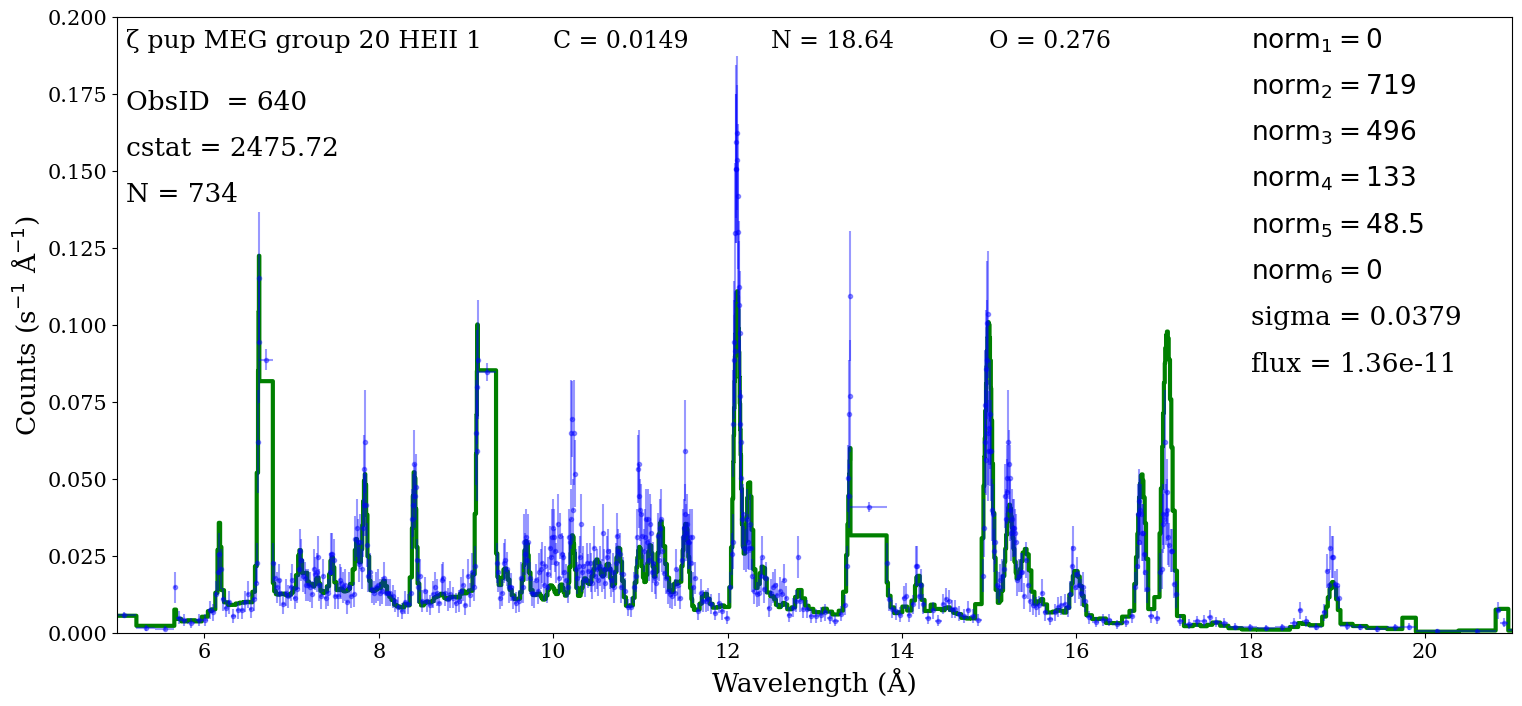

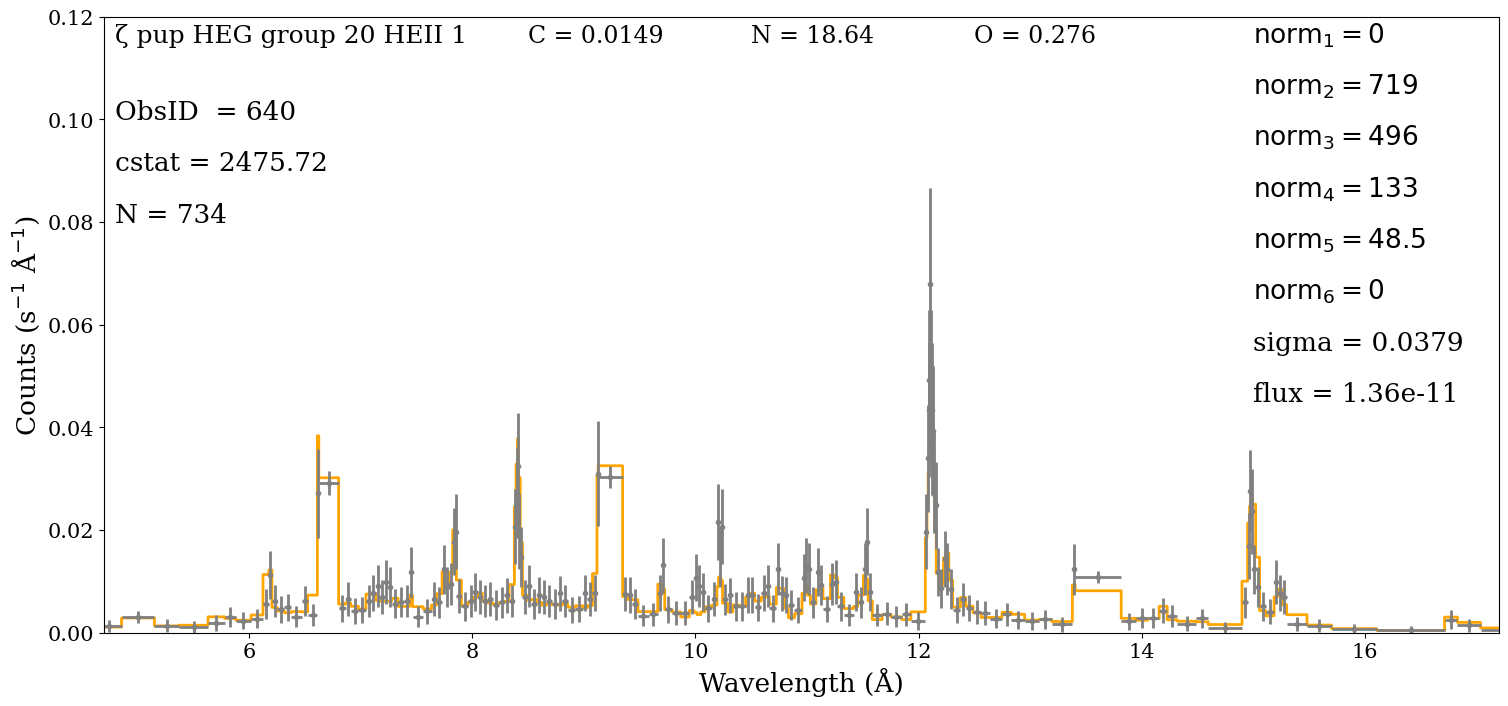

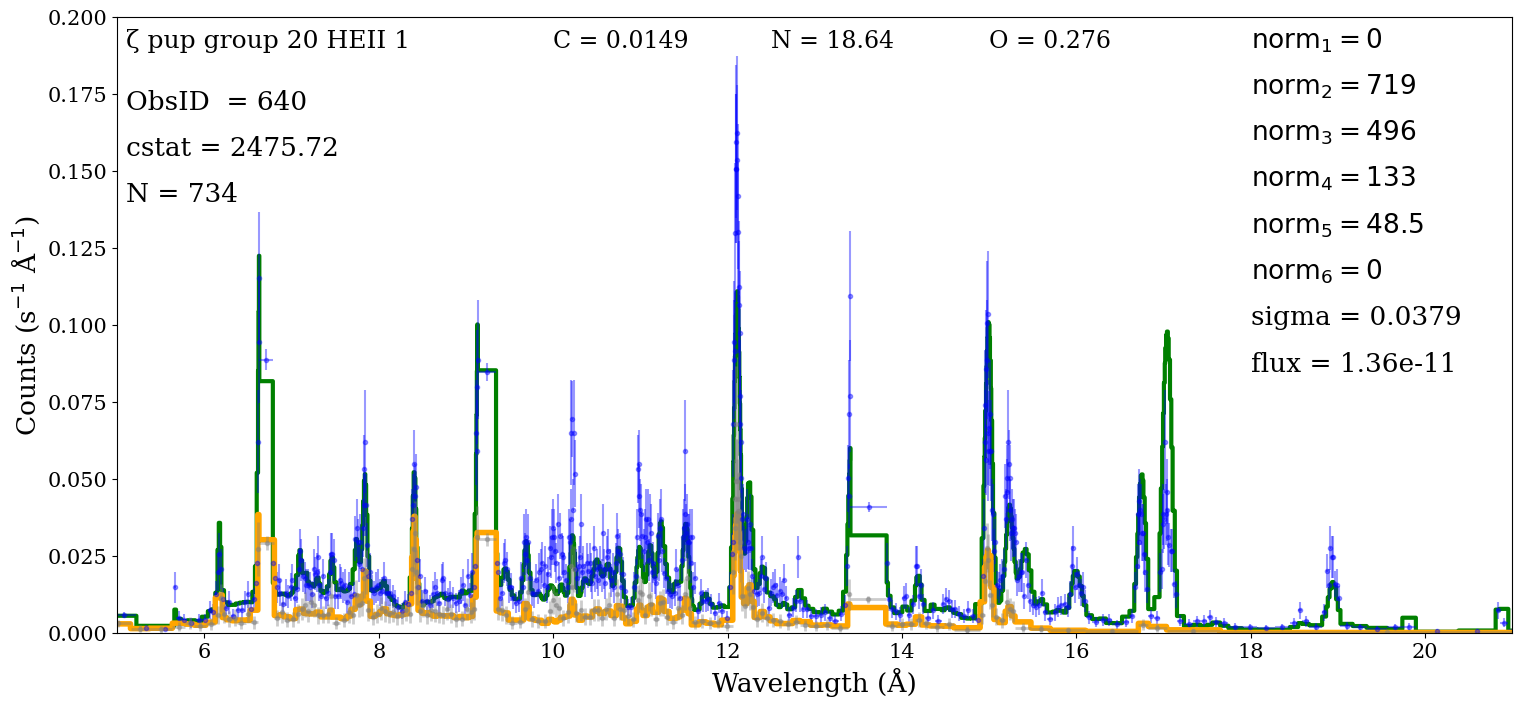

In [16]:
meg_action()    
heg_action()    
both_action()

Do you want 'meg', 'heg', or 'both'?  meg


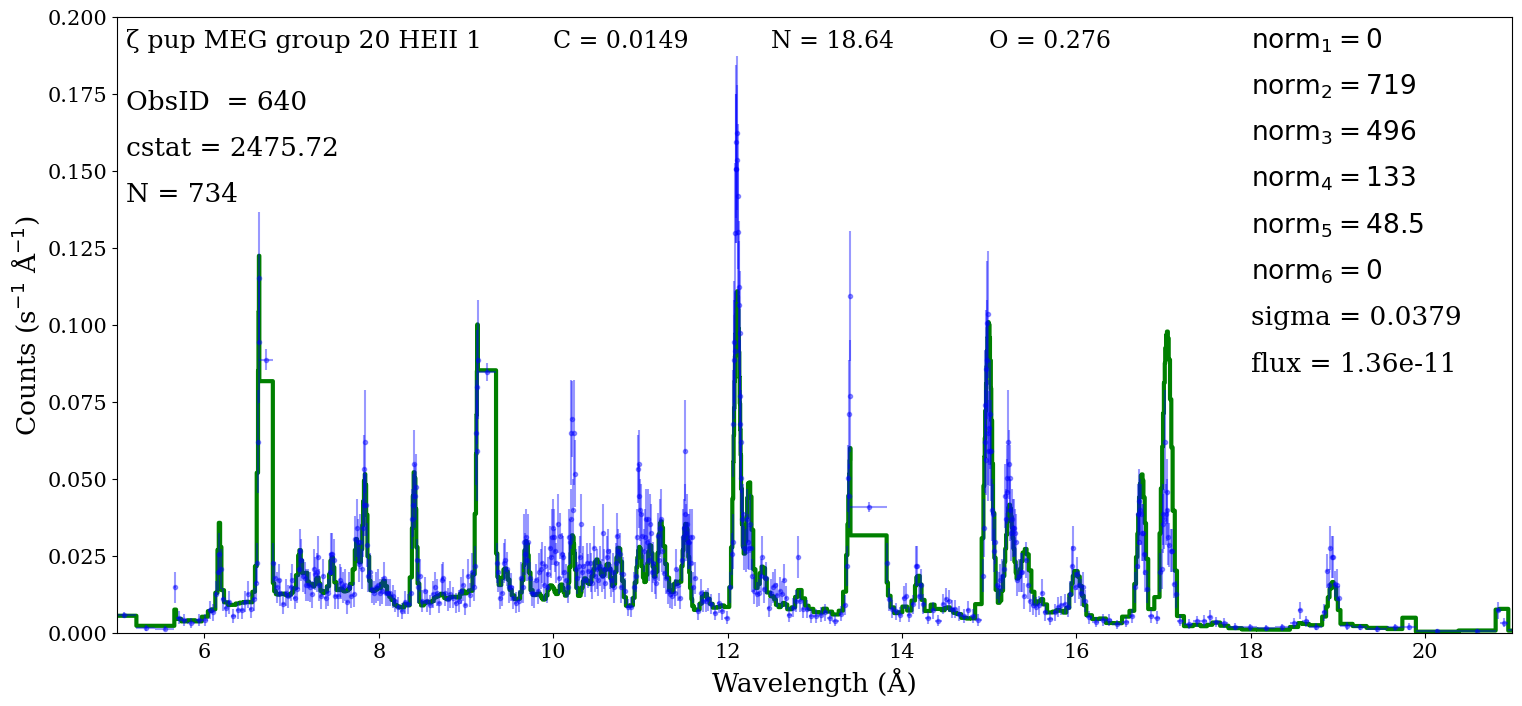

In [17]:
# you have an option to have a user input, in case you would prefer to load the graphs in one at a time 

choice = input("Do you want 'meg', 'heg', or 'both'? ").strip().lower()

if choice == "meg":
    meg_action()
elif choice == "heg":
    heg_action()
elif choice == "both":
    both_action()
else:
    print("Invalid choice. Please enter 'meg', 'heg', or 'both'.")